In [3]:
# install pygame
# pip install pygame

# install ple
# git clone https://github.com/ntasfi/PyGame-Learning-Environment.git
# cd PyGame-Learning-Environment/
# pip install -e .

# install gym_ple
# pip install gym_ple

In [9]:
%matplotlib inline
import time
 
import gym
import gym_ple
import matplotlib
from matplotlib.pyplot import imshow, show
from collections import deque
# from skimage import color, transform

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as T

import warnings
warnings.filterwarnings('ignore')

# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display
    
env = gym.make('FlappyBird-v0').unwrapped


In [10]:
env.action_space, env.observation_space

(Discrete(2), Box(512, 288, 3))

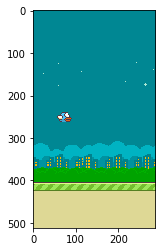

In [12]:
state = env.reset()
next_state, reward, done, _ = env.step(1)
imshow(next_state)

In [18]:
transform = T.Compose([T.ToPILImage(),
                       T.Grayscale(),
                       T.Resize((80,45)),
                       T.ToTensor()])

toPIL = T.ToPILImage()

def preprocess_frame(frame):
    new_frame = frame[:400, 40:]

    return transform(new_frame)

In [15]:
# def preprocess_frame(frame):
    
#     cropped = frame[:400, 40:]
#     gray = color.rgb2gray(cropped)
#     normalized = gray/255.0
    
#     resized = transform.resize(normalized, (80, 45))
    
#     return resized

torch.Size([1, 80, 45])


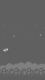

In [23]:
t= preprocess_frame(next_state)
print(t.size())
toPIL(t)

In [33]:
tt=[t,t,t,t]
torch.cat(tt, dim=0).size()

torch.Size([4, 80, 45])

In [46]:
stack_size = 4
stacked_frame = deque([torch.zeros((1, 80, 45), dtype=torch.float32) for i in range(stack_size)])


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

In [47]:
stack_size = 4

stacked_frames = deque([torch.zeros((1, 80, 45), dtype=torch.float32) for i in range(stack_size)])

def stack_frames(stacked_frames, state, new_episode: True):
    processed_state = preprocess_frame(state)
    if new_episode:
        for i in range(stack_size):
            stacked_frames.append(processed_state)
    else:
        stacked_frames.append(processed_state)
    stacked = torch.cat(stack_frames, dim=0)
    return stacked_state, stacked_frames 

In [66]:
class DQN(object):
    def __init__(self):
        self.conv1 = nn.Sequential(
            nn.Conv2d(4, 16, kernel_size=5, stride=2),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=2),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.fc1 = nn.Sequential(
            nn.Linear(1344, 100),
            nn.BatchNorm1d(100),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(100, 2)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.fc1(x.view(x.size(0), -1))
        return self.fc2(x)

In [67]:
x = torch.zeros([32,4,80,45])
dqn = DQN()
dqn.forward(x)

tensor([[ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743],
        [ 0.0622, -0.0743]], grad_fn=<ThAddmmBackward>)

In [6]:
env.observation_space

Box(512, 288, 3)

In [10]:
state = env.reset()

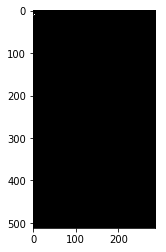

In [13]:
plt.imshow(state)

In [18]:
state = env.render(mode='rgb_array')

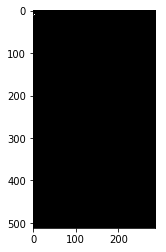

In [19]:
plt.imshow(state)

In [22]:
next_state = env.step(1)

In [ ]:
# next_state

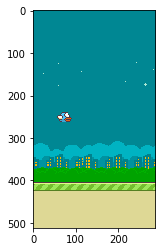

In [25]:
plt.imshow(next_state[0])

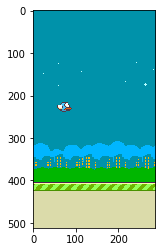

KeyboardInterrupt: 

In [14]:
env.seed(0)
agent = RandomAgent(env.action_space)

episode_count = 100
reward = 0
done = False

for i in range(episode_count):
    ob = env.reset()

    while True:
        action = agent.act(ob, reward, done)

        ob, reward, done, _ = env.step(action)
        
#         print(ob)
        clear_output(wait=True)
        plt.imshow(ob)
        show()
        time.sleep(.1)
        
        if done:
            break
        # Note there's no env.render() here. But the environment still can open window and
        # render if asked by env.monitor: it calls env.render('rgb_array') to record video.
        # Video is not recorded every episode, see capped_cubic_video_schedule for details.
